# Curs 5: Regresia liniara

In [1]:
# Selectarea modelelor prin cross-validation; optimizarea modelelor prin cross-validation

Prin regresie se doreste estimarea unei valori continue: temperatura de maine, valoarea estimata pentru un serviciu/bun cumparat etc. Prin comparatie, clasificarea dorea estimarea unei valori de iesire dintr-o multime finita de posibilitati (clase).

## 5.1. Regresia liniara

### Exemplu de problema

Sa presupunem ca dorim sa modelam pretul de vanzare al unei proprietati imobiliare, *e.g.* case. Se cunosc $m$ cazuri de vanazare-cumparare de case. Fiecare casa vanduta este descrisa printr-un set de trasaturi (eng: features) cum ar fi: suprafata (sau numarul de camere), distanta de la ea pana la centrul orasului, gradul de poluare a zonei etc - toate valori numerice. De asemena, pentru fiecare casa se cunoaste care a fost pretul de vanzare-cumparare. Un astfel de set de date este [Boston housing](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). 

Se doreste a se construi un model care, plecand de la datele furnizate, sa fie capabil sa "invete" sa aproximeze valoarea unei noi proprietati pentru care valorile de intrare se cunosc.

Avem de-a face cu
* problema de instruire supervizata (se cunosc asocieri intre trasaturi de intrare - valoare de iesire);
* prblema de regresie - valoarea estimata este una continua, nu dintr-o multime predefinita de clase. 

### Regresia liniara

Se poate consulta Cursul 2 din [Sisteme computationale inteligente, note de curs](https://github.com/lmsasu/cursuri/blob/master/SistemeComputationaleInteligente/SistemeComputationaleInteligente.pdf), pentru expunere mai ampla, algoritm de instruire bazat pe stochastic gradient descent si metoda ecuatiilro normale. O scurta descriere este data mai jos. 

Notatii:
* $x_1, x_2, \dots, x_n$: valorile numerice aferente unei case: suprafata, distanta pana la centrul orasului etc. 
* $\theta_0, \theta_1, \dots, \theta_n$ sunt coeficienti care trebuie determinati. Se observa ca avem cu un coeficient mai mult decat valori de trasaturi. 

In regresia liniara se presupune ca valoarea de iesire (pretul) variaza liniar cu valorile trasaturilor de intrare. Se noteaza un astfel de model cu $h$; dependenta lui de un vector de coeficienti - numit si vectori de ponderi (eng: weights) - se marcheaza explicit prin notatia $h_\theta$. Forma modelului este:
$$
h_{\theta}(\mathbf{x}) = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + \dots +\theta_n \cdot x_n
$$
Primul termen al expresiei de dupa egal se poate scrie sub forma: $\theta_0 \cdot 1$. Daca notam cu $x_0$ valoarea constanta 1, asta ne permite sa consideram doi vectori cu $n+1$ componente:
* $\mathbf{x} = \begin{pmatrix}
x_0 \\
x_1 \\
x_2 \\
\vdots \\
x_n
\end{pmatrix}
$ este vectorul de intrare continand caracteristicile numerice ale unei case oarecare;
* $\boldsymbol{\theta} = \begin{pmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_n
\end{pmatrix}
$ este vectorul de coeficienti.

Relatia de mai sus pentru $h_{\theta}$ se scrie mai concis astfel:
$$
    h_\theta(\mathbf{x}) =  \boldsymbol{\theta}^t \cdot \mathbf{x} 
$$
care, desigur, in NumPy se scrie cu 
```python
np.dot(theta, x)
```

Ceea ce trebuie facut este determinarea coeficientilor din vectorul $\boldsymbol{\theta}$ pentru care valoarea medie a patratelor diferentelor dintre estimarea facuta de model pentru valoarea de vanzare a unei case si valoarea ei cunoscuta sa fie cat mai mica:
$$
J(\boldsymbol{\theta}) = \frac{1}{m} \sum\limits_{i=1}^p \left( h_{\theta}(\mathbf{x}_i) - y_i \right)^2
$$
unde: $p$ este numarul de cazuri de vanzare cunoscute, $\mathbf{x}_i$ este vectorul de trasaturi pentru casa $i$, $y_i$ este suma cu care s-a vandut aceasta casa. 

Modelul rezultat este simplu, popular, interpretabil. Poate fi insa prea simplist pentru destul de multe cazuri.  

Sunt doua variante de determinarea a acelui vector de coeficienti $\boldsymbol{\theta}$ care face ca valoarea functiei de eroare sa fie minima. Cititorul poate consulta cursul indicat la inceputul sectiunii. Noi vom folosi implementari din biblioteca scikit learn. 

%TODO: de adaugat alte referinte la http://blog.kaggle.com/2015/05/28/scikit-learn-video-6-linear-regression-plus-pandas-seaborn/: seaborn.

### Setul de date

Setul de date este [Boston housing](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/): "Concerns housing values in suburbs of Boston", cu 506 instante (case vandute), 12 trasaturi de intrare. Toate valorile sunt precizate. Descrierea setului de date se gaseste [aici](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

### Citirea datelor

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
url_housing = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [4]:
data_house = pd.read_csv(url_housing, names=names, delimiter=r'\s+')

In [5]:
data_house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
data_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


### Impartirea setului de date in set de antrenare si set de testare

Ca si in cazul problemelor de clasificare, o parte din date vor fi folosite pentru antrenare, iar modeul rezultate va fi testat pe restul de date - setul de testare. 

In [7]:
X = data_house.values[:, :-1]
y = data_house.values[:, -1]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34)

### Reprezentare de valori

Text(0,0.5,'Median value of owner-occupied homes in $1000s')

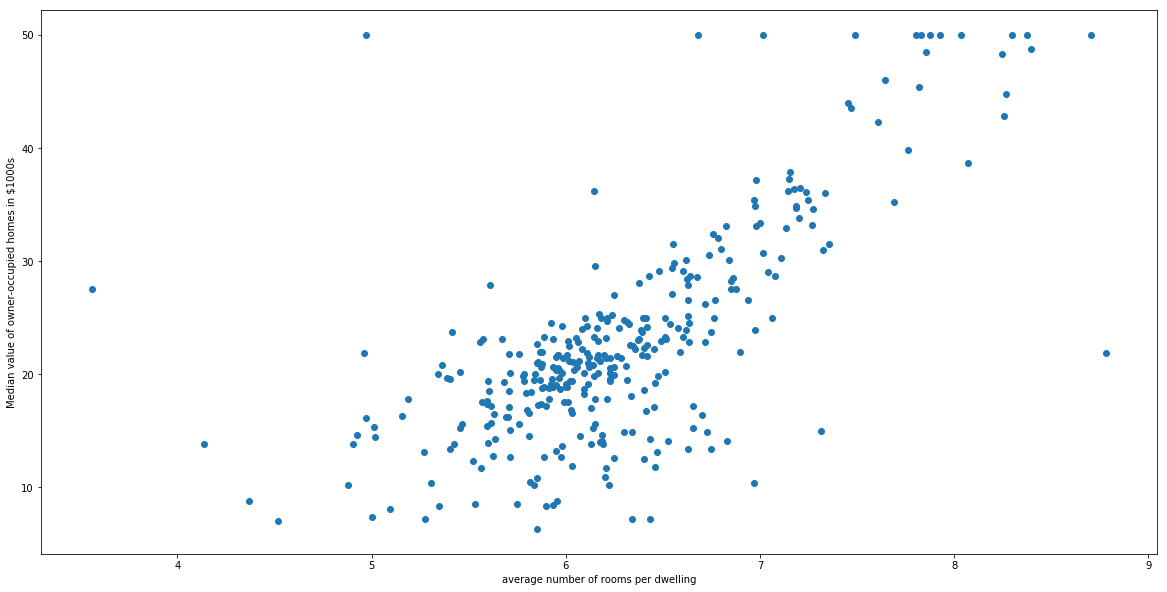

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plt.scatter(X_train[:, 5], y_train)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000''s')

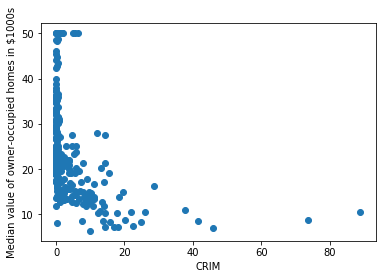

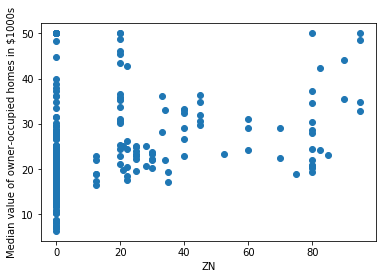

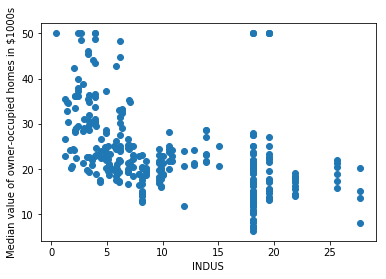

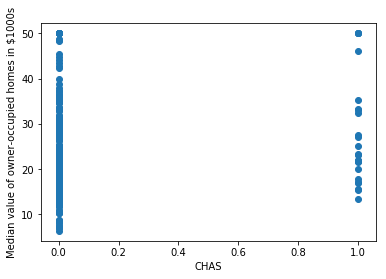

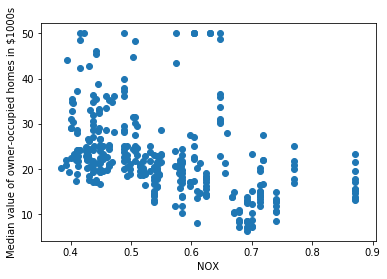

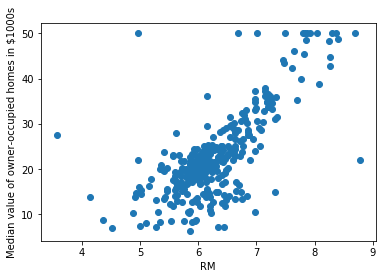

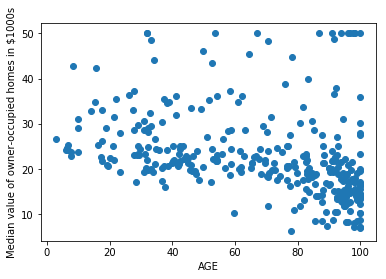

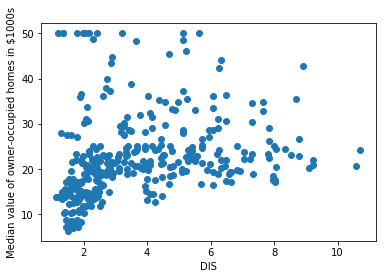

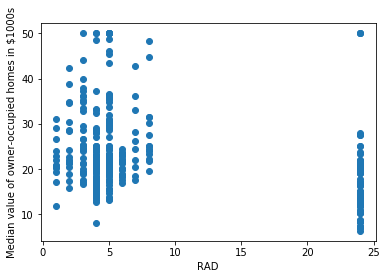

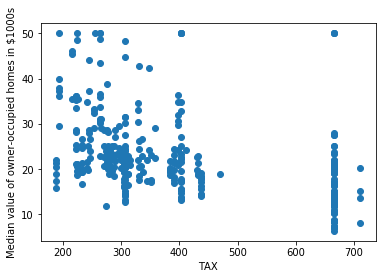

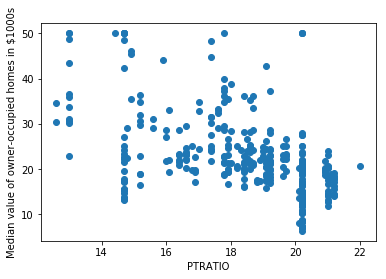

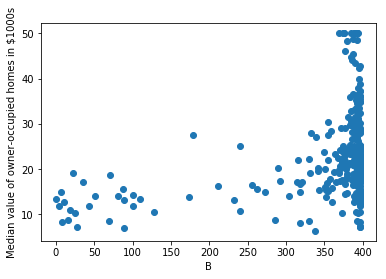

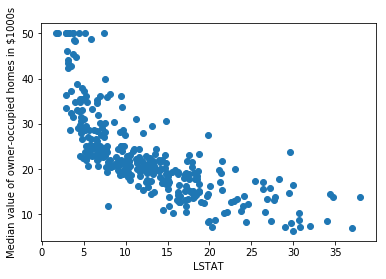

In [10]:
for index, name in enumerate(names[:-1]):
    plt.scatter(X_train[:, index], y_train)
    plt.xlabel(name)
    plt.ylabel('Median value of owner-occupied homes in $1000''s')
    plt.show()

### Construirea modelului

In [11]:
#instantiere model, antrenare
model = LinearRegression(normalize=False)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
#tiparirea coeficientilor rezultati
print(list(zip(model.coef_, names)))

[(-0.10862908766310242, 'CRIM'), (0.044938475512644294, 'ZN'), (0.0001277480027805783, 'INDUS'), (1.7122322544764395, 'CHAS'), (-18.4579037932357, 'NOX'), (4.415984589961152, 'RM'), (-0.004201111498377763, 'AGE'), (-1.582758701848483, 'DIS'), (0.24997090278654133, 'RAD'), (-0.009425685674251838, 'TAX'), (-0.9848865596268013, 'PTRATIO'), (0.010667354793253203, 'B'), (-0.4552335940589085, 'LSTAT')]


In [13]:
#predictie pe setul de test
y_hat = model.predict(X_test)

In [14]:
#afisarea primelor trei predictii
print(y[0:3])
print(y_hat[0:3])

[24.  21.6 34.7]
[20.92262648 18.85291992 26.97403878]


### Calculare metricilor de eroare

Ne intereseaza cat de deparrate sunt valorile prezise de cele actuale. Aceasta se face pe baza unor metrici de eroare. Sunt mai multe metrici care se pot considera pentru o problema de regresie:
1. Mean absolute error (MAE):
$$
MAE = \frac{1}{n}\sum\limits_{i=1}^n \left|y_i - \hat{y}_i\right|
$$
unde $n$ e numarul de cazuri peste care modelul a produs estimari - de exemplu, numarul de cazuri din setul de testare.
1. Root mean squared error (RMSE):
$$
RMSE = \sqrt{\frac{1}{n} (y_i - \hat{y}_i)^2}
$$
1. Intrucat functia radical este crescatoare, se prefera uneori a se renunta la radical, obtinand Mean squared error (MSE):
$$
MSE = \frac{1}{n} (y_i - \hat{y}_i)^2
$$

In sklearn exista modulul `sklearn.metrics` care contine functii si clase dedicate calculului metricilor de eroare. 

In [15]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_hat)
mse = metrics.mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
print('mae={0}, mse={1}'.format(mae, mse))

mae=3.2499587242626005, mse=23.280598795648395


Putem incerca cu diferite subsetui de trasaturi. De exemplu, atributul CHAS este descris in documentatie ca 'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)'. Putem incerca sa vedem cum functioneaza modelul de regresie fara el:

In [16]:
names_woCHAS = [item for item in names if item != 'CHAS']

data_house_noCHAS = data_house[names_woCHAS]
data_house_noCHAS.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [17]:
X = data_house_noCHAS.values[:, :-1]
y = data_house_noCHAS.values[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34)

#instantiere model, antrenare
model = LinearRegression(normalize=False)
model.fit(X_train, y_train)

#predictie pe setul de test
y_hat = model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_hat)
mse = metrics.mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
print('mae={0}, mse={1}'.format(mae, mse))

#se remarca o usoara imbunatatire ameloro scoruri. 

mae=3.302280163132658, mse=18.78537396894365
